In [20]:
# Importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [21]:
# loading the dataframe
heart_data = pd.read_csv('Datasets/heart_disease_data.csv')

In [22]:
# viewing the data
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Number of rows and columns 
heart_data.shape

(303, 14)

In [24]:
# getting some info about data
heart_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
# Statistical measure about data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# Checking the distribution of target variable
heart_data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Separting the data and labels

In [27]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [28]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [29]:
# Splitting the data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, stratify= Y)

In [30]:
print(X_train.shape, X_test.shape, X.shape)

(242, 13) (61, 13) (303, 13)


Training the model

In [31]:
model = LogisticRegression()

In [32]:
# Training the LogisticRegression model with training data
model.fit(X_train,y_train)
y_pred_logistic=model.decision_function(X_test)

c:\Users\moksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evalutaion

Accuracy Score


In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print("Accuracy score for training data ",training_data_accuracy*100,"%")

Accuracy score for training data  86.36363636363636 %


In [34]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Accuracy score for test data: ",test_data_accuracy*100,"%")


Accuracy score for test data:  81.9672131147541 %


Making a predictive system

In [35]:
data = (45,0,1,130,234,0,0,175,0,0.6,1,0,2)

input_data_as_numpy_array = np.asarray(data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

c:\Users\moksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:

if(prediction):
    print('The person has heart disease')
else:
    print('The person is healthy')

The person has heart disease


In [37]:
import pickle

In [38]:
directory_path = 'saved_models/'
# Specify the filename
filename = 'heart_disease_model.sav'

# Concatenate directory path and filename to get the full path
file_path = directory_path + filename

# Open the file in binary write mode and dump the model
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

ROC Curve

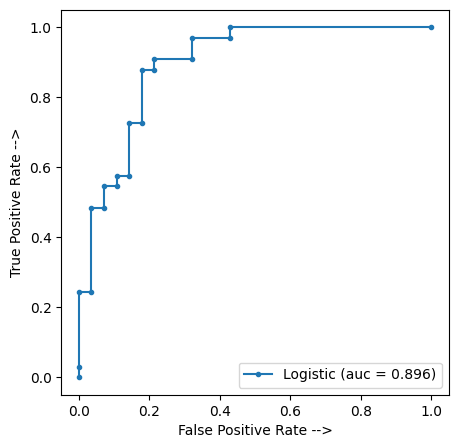

In [39]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [40]:
"""
Insights of using Logistic Regression

Simplicity and Interpretability: Logistic regression is a straightforward and well-understood algorithm, making it easy to implement and interpret. The model provides coefficients that can be directly associated with the importance of each feature, offering clear insights into the relationships between variables.

Probabilistic Nature: It estimates the probabilities of the different possible outcomes, which is particularly useful in medical settings where understanding the risk factor is as important as the classification itself.

Efficiency: Logistic regression can be very efficient with large datasets. It doesn’t require high computational resources, which makes it a practical choice when working with extensive data.

Performance: Despite its simplicity, logistic regression can perform quite well on binary classification problems, especially when the dataset is linearly separable.

Flexibility: The model can easily be updated to include different or additional explanatory variables, which allows for flexibility in exploring the impact of various factors on heart rate prediction.
"""

'\nInsights of using Logistic Regression\n\nSimplicity and Interpretability: Logistic regression is a straightforward and well-understood algorithm, making it easy to implement and interpret. The model provides coefficients that can be directly associated with the importance of each feature, offering clear insights into the relationships between variables.\n\nProbabilistic Nature: It estimates the probabilities of the different possible outcomes, which is particularly useful in medical settings where understanding the risk factor is as important as the classification itself.\n\nEfficiency: Logistic regression can be very efficient with large datasets. It doesn’t require high computational resources, which makes it a practical choice when working with extensive data.\n\nPerformance: Despite its simplicity, logistic regression can perform quite well on binary classification problems, especially when the dataset is linearly separable.\n\nFlexibility: The model can easily be updated to inc